no display found. Using non-interactive Agg backend


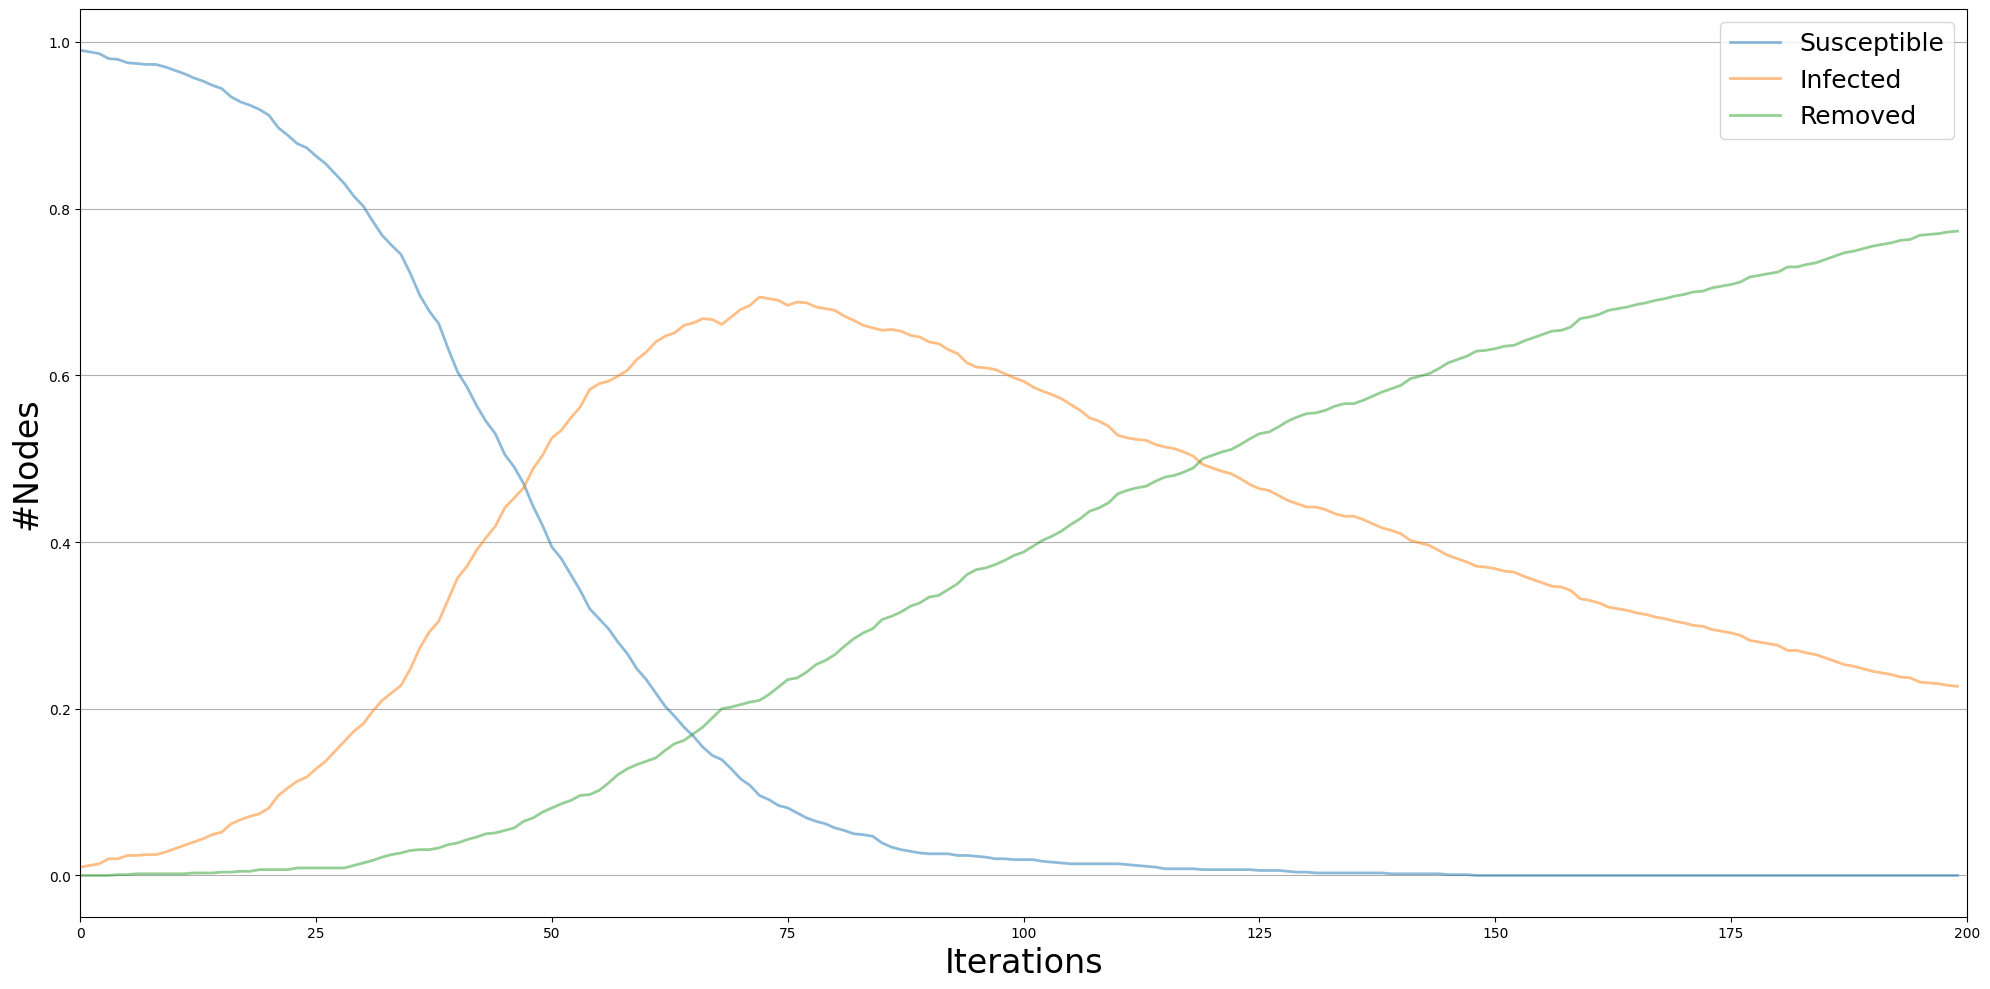

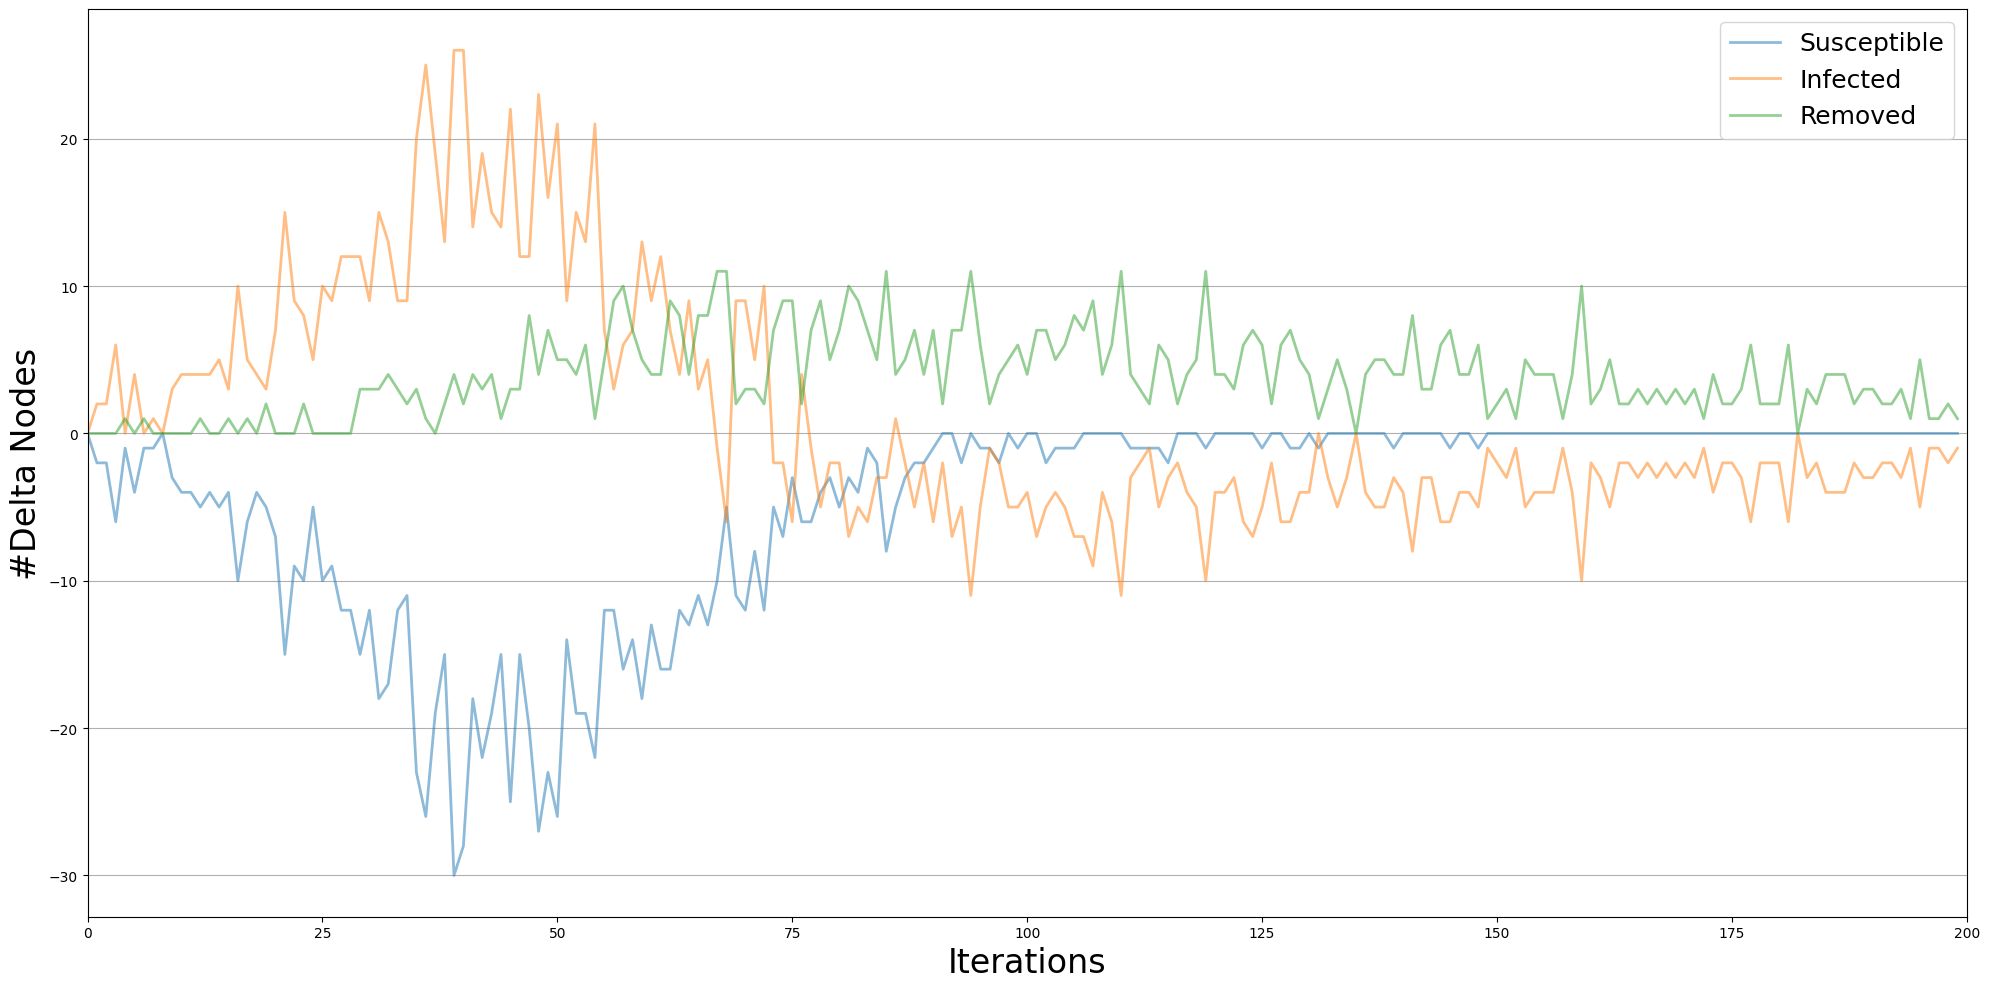

"\nSe ho come status del modello 0 (suscettibile), 1 (infetto) e 2 (rimosso)\n\n- status: indica i nodi che hanno cambiato stato e il loro nuovo stato\n\n\nIl con il trend otterrò un oggetto con i seguenti campi\n- node_count: che tiene il numero di noti di ogni stato per ogni iterazione\n    Es:\n    N. iter     Status      Count \n    0           0           990\n    0           1           10\n    0           2           0\n    1           0           987\n    1           1           13\n    1           2           0\nNumero di nodi 100 con 0.01% nodi infetti all'inizio\n\n- status_delta: invece rappresenta la variazione di stato rispetto alla precedente iterazione\nN.iter      Status      Delta\n0           0           0\n0           1           0\n0           2           0\n1           0           -3 (987-990)\n1           1           3 (13-10)\n1           2           0 \n"

In [1]:
import networkx as nx #Import networkx library used to create and manipulate graphs
import ndlib.models.epidemics as ep #Import the epidemics module from ndlib
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json

#Create a graph object
g = nx.erdos_renyi_graph(1000, 0.1)


#Create a SIR model object
model = ep.SIRModel(g)
'''
Every diffusion model in ndlib has a set of parameters and the ModelConfig interface takes care of validating and setting them.
The parameters of the model can be accessed through the parameters attribute of the model object.
'''
#print(json.dumps(model.parameters, indent=2)) #Print the model parameters

#print(model.available_statuses) #Print the available statuses of the model

#Set the initial status of the nodes and the initial condition of the simulation
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01) # percentage of infected nodes
model.set_initial_status(cfg)
#print(model.get_model_parameters())

#Simulate the model
'''
The iteration_bunch method of the model object is used to simulate the model for a given number of iterations, 
the node_status parameter is used to return the status of the nodes at each iteration.
'''
iterations = model.iteration_bunch(200, node_status=True)
#print(json.dumps(iterations, indent=2)) #Print the status of the nodes at each iteration

'''
To abstract from iterations details it is possible to transform them into diffusion trends using the build_trends(iterations) method:
'''
trends = model.build_trends(iterations)
#print(json.dumps(trends, indent=2)) #Print the diffusion trends


%matplotlib inline
'''
Diffusion Trend: This is a graph that shows the number of individuals in each state (Susceptible, Infected, Recovered, etc.) over time. It gives an 
overview of how the epidemic is spreading and how its impact is changing over time. The y-axis represents the number of individuals and the x-axis 
represents time.
'''
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

'''
Diffusion Prevalence: This is a graph that shows the prevalence of the epidemic at each time step. Prevalence is defined as the proportion of a 
population who have (or had) a specific characteristic (in this case, being infected) in a given time period. In the context of an epidemic, it's 
the proportion of the population that is infected at each time step. The y-axis represents the proportion of individuals and the x-axis represents 
time. 
'''
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()



'''
Se ho come status del modello 0 (suscettibile), 1 (infetto) e 2 (rimosso)

- status: indica i nodi che hanno cambiato stato e il loro nuovo stato


Il con il trend otterrò un oggetto con i seguenti campi
- node_count: che tiene il numero di noti di ogni stato per ogni iterazione
    Es:
    N. iter     Status      Count 
    0           0           990
    0           1           10
    0           2           0
    1           0           987
    1           1           13
    1           2           0
Numero di nodi 100 con 0.01% nodi infetti all'inizio

- status_delta: invece rappresenta la variazione di stato rispetto alla precedente iterazione
N.iter      Status      Delta
0           0           0
0           1           0
0           2           0
1           0           -3 (987-990)
1           1           3 (13-10)
1           2           0 
'''

[{'trends': {'node_count': {0: [950, 948, 941, 938, 935, 934, 929, 922, 914, 906, 901, 892, 884, 874, 863, 853, 842, 838, 825, 813, 793, 783, 767, 744, 733, 716, 702, 683, 658, 641, 628, 598, 584, 565, 548, 531, 516, 505, 482, 465, 438, 422, 411, 394, 369, 345, 327, 309, 294, 276, 268, 255, 240, 231, 216, 203, 195, 185, 176, 168, 166, 161, 160, 156, 147, 142, 137, 137, 127, 130, 119, 120, 122, 127, 124, 129, 126, 122, 117, 114, 100, 110, 108, 110, 105, 106, 102, 99, 104, 101, 100, 101, 101, 103, 108, 108, 105, 100, 101, 100, 103, 107, 104, 101, 105, 107, 106, 110, 109, 117, 110, 115, 115, 117, 118, 109, 108, 97, 103, 106, 115, 107, 112, 113, 114, 110, 108, 108, 114, 117, 120, 123, 121, 112, 108, 111, 114, 116, 117, 121, 126, 126, 124, 126, 114, 110, 108, 109, 103, 101, 115, 115, 116, 115, 110, 105, 101, 107, 102, 98, 98, 101, 97, 101, 103, 102, 106, 98, 99, 93, 102, 98, 100, 102, 101, 103, 92, 91, 100, 98, 104, 102, 103, 112, 116, 117, 115, 115, 109, 109, 117, 121, 120, 117, 111, 115, 

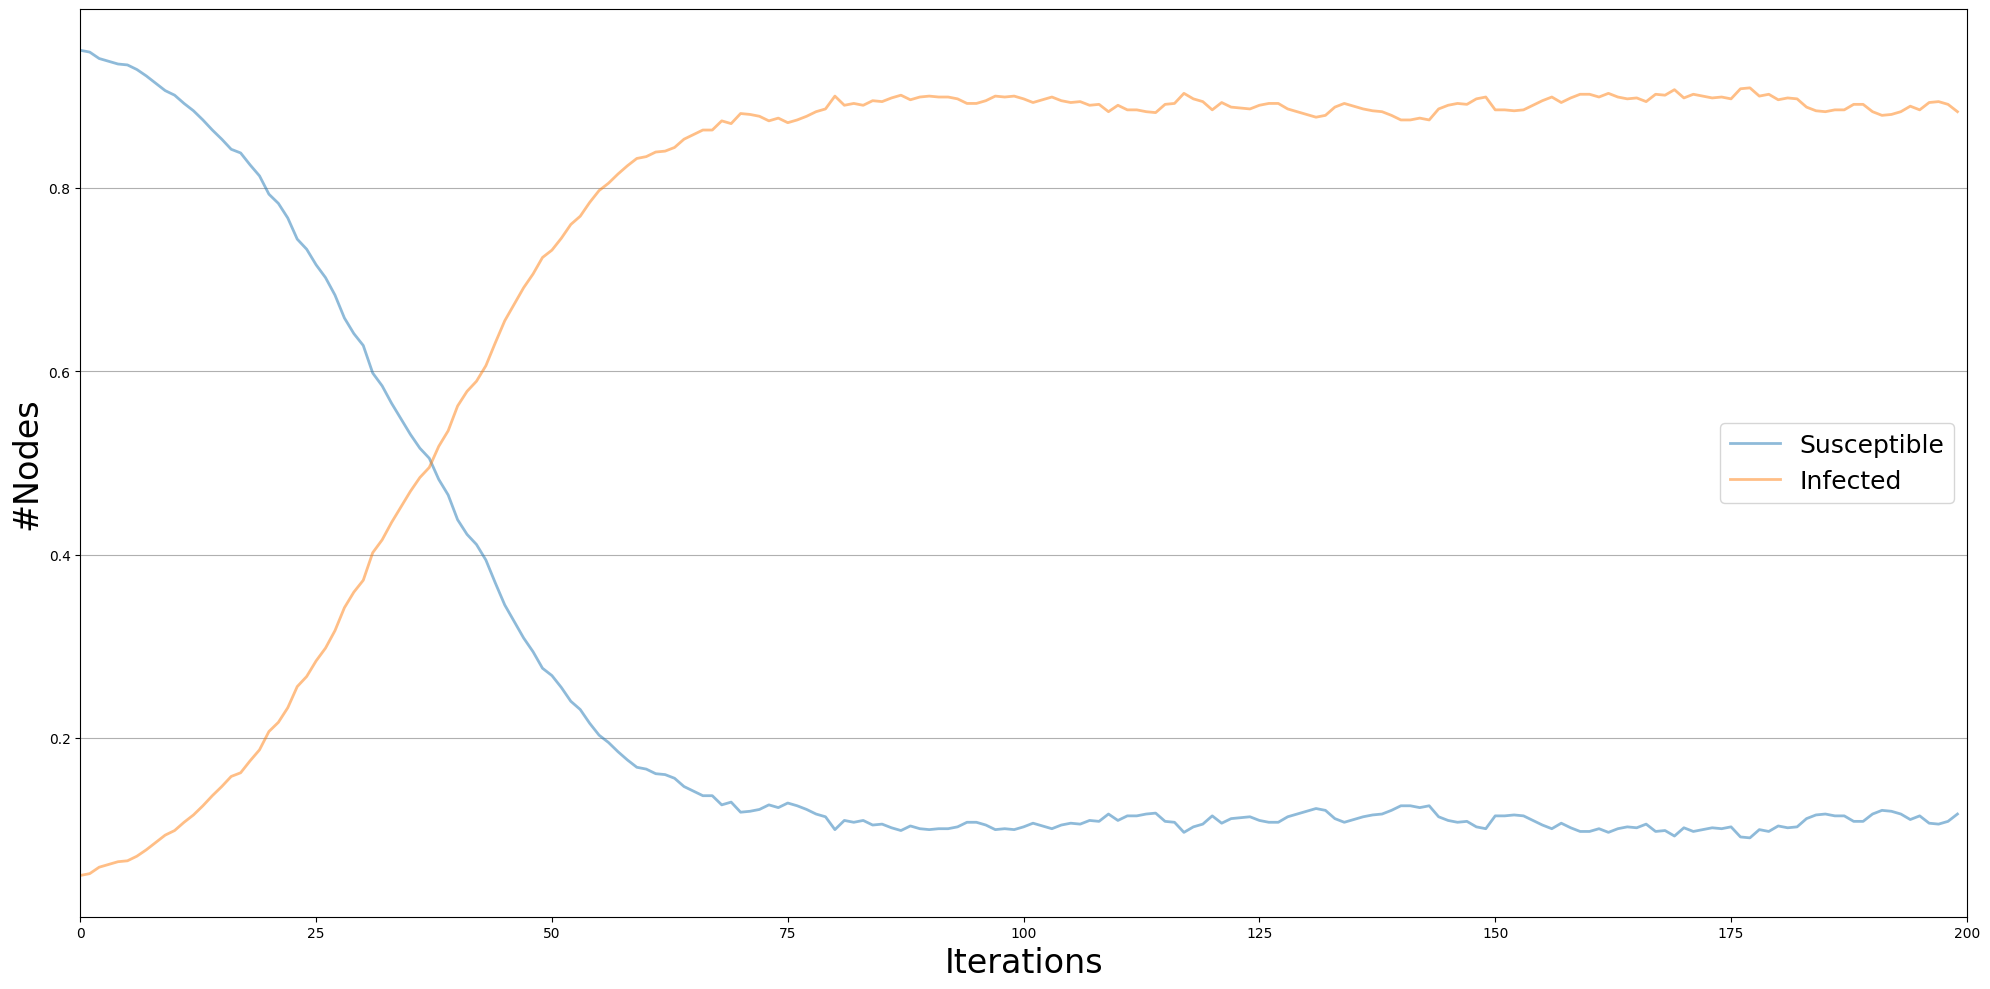

In [40]:
#Multiplot example
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

# Network Definition
g = nx.erdos_renyi_graph(1000, 0.1)
# Model Selection
model = ep.SISModel(g)
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('lambda', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)
# Simulation

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)
print(trends)

viz = DiffusionTrend(model, trends)
viz.plot()

# viz = DiffusionPrevalence(model, trends)
# viz.plot()
